## 비대칭 데이터 문제 ##

데이터 클래스 비율이 너무 차이가 나면(highly-imbalanced data) 단순히 우세한 클래스를 택하는 모형의 정확도가 높아지므로 모형의 성능판별이 어려워진다. 즉, 정확도(accuracy)가 높아도 데이터 갯수가 적은 클래스의 재현율(recall-rate)이 급격히 작아지는 현상이 발생할 수 있다.

이렇게 각 클래스에 속한 데이터의 갯수의 차이에 의해 발생하는 문제들을 비대칭 데이터 문제(imbalanced data problem)이라고 한다.

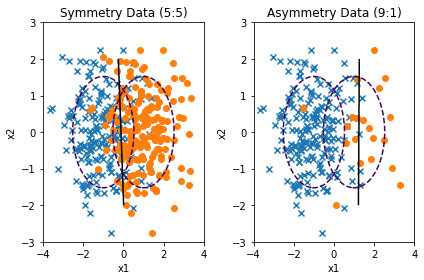

In [2]:
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

def classification_result(n0, n1, title=""):
    rv1 = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
    rv2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
    X0 = rv1.rvs(n0, random_state=0)
    X1 = rv2.rvs(n1, random_state=0)
    X = np.vstack([X0, X1])
    y = np.hstack([np.zeros(n0), np.ones(n1)])

    x1min = -4; x1max = 4
    x2min = -2; x2max = 2
    xx1 = np.linspace(x1min, x1max, 1000)
    xx2 = np.linspace(x2min, x2max, 1000)
    X1, X2 = np.meshgrid(xx1, xx2)

    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")

    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="0 Class")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="1 Class")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    
    return model, X, y, y_pred
    
plt.subplot(121)
model1, X1, y1, y_pred1 = classification_result(200, 200, "Symmetry Data (5:5)")
plt.subplot(122)
model2, X2, y2, y_pred2 = classification_result(200, 20, "Asymmetry Data (9:1)")
plt.tight_layout()
plt.show()

In [3]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y1, y_pred1))
print(classification_report(y2, y_pred2))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       200
         1.0       0.84      0.86      0.85       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220



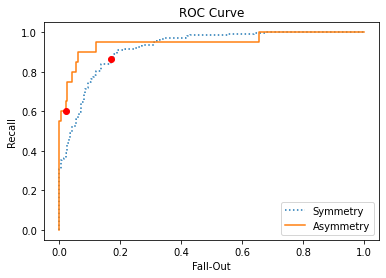

In [4]:
from sklearn.metrics import roc_curve, confusion_matrix 
fpr1, tpr1, thresholds1 = roc_curve(y1, model1.decision_function(X1)) 
fpr2, tpr2, thresholds2 = roc_curve(y2, model2.decision_function(X2)) 

c1 = confusion_matrix(y1, y_pred1, labels=[1, 0]) 
c2 = confusion_matrix(y2, y_pred2, labels=[1, 0]) 
r1 = c1[0, 0] / (c1[0, 0] + c1[0, 1]) 
r2 = c2[0, 0] / (c2[0, 0] + c2[0, 1]) 
f1 = c1[1, 0] / (c1[1, 0] + c1[1, 1]) 
f2 = c2[1, 0] / (c2[1, 0] + c2[1, 1]) 

plt.plot(fpr1, tpr1, ':', label="Symmetry") 
plt.plot(fpr2, tpr2, '-', label="Asymmetry") 
plt.plot([f1], [r1], 'ro') 
plt.plot([f2], [r2], 'ro') 
plt.legend()
plt.xlabel('Fall-Out')
plt.ylabel('Recall') 
plt.title('ROC Curve') 
plt.show()


## 비대칭 문제 해결 방법 ##

비대칭 데이터는 다수 클래스 데이터에서 일부만 사용하는 언더 샘플링이나 소수 클래스 데이터를 증가시키는 오버 샘플링을 사용하여 데이터 비율을 맞추면 정밀도(precision)가 향상된다.

* 오버샘플링(Over-Sampling)
* 언더샘플링(Under-Sampling)
* 샘플링(Combining Over-and Under-Sampling)



In [6]:
# 클래스 불균형 처리를 해주는 imbalanced-learn를 호출
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import scipy as sp
import numpy as np
from imblearn.under_sampling import *

n0 = 200; n1 = 20
rv1 = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
rv2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
X0 = rv1.rvs(n0, random_state=0)
X1 = rv2.rvs(n1, random_state=0)
X_imb = np.vstack([X0, X1])
y_imb = np.hstack([np.zeros(n0), np.ones(n1)])

x1min = -4; x1max = 4
x2min = -2; x2max = 2
xx1 = np.linspace(x1min, x1max, 1000)
xx2 = np.linspace(x2min, x2max, 1000)
X1, X2 = np.meshgrid(xx1, xx2)

def classification_result2(X, y, title=""):
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="0 클래스")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="1 클래스")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    return model


랜덤 샘플링: 무작위로 데이터를 없애는 단순 샘플링

In [7]:
X_samp, y_samp = RandomUnderSampler(random_state=0).fit_sample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

AttributeError: 'RandomUnderSampler' object has no attribute 'fit_sample'

토멕링크(Tomek’s link)란 서로 다른 클래스에 속하는 한 쌍의 데이터 (x+,x−)로 서로에게 더 가까운 다른 데이터가 존재하지 않는 것
* 즉 클래스가 다른 두 데이터가 아주 가까이 붙어있으면 토멕링크가 된다. 
* 토멕링크 방법은 이러한 토멕링크를 찾은 다음 그 중에서 다수 클래스에 속하는 데이터를 제외하는 방법으로 경계선을 다수 클래스쪽으로 밀어붙이는 효과가 있다.

In [5]:
X_samp, y_samp = TomekLinks(random_state=0).fit_sample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

NameError: name 'TomekLinks' is not defined

In [ ]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

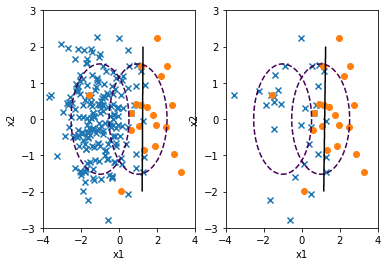

In [9]:
X_samp, y_samp = CondensedNearestNeighbour(random_state=0).fit_sample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

One Sided Selection은 토맥링크 방법과 Condensed Nearest Neighbour 방법을 섞은 것
* 토맥링크 중 다수 클래스를 제외하고 나머지 데이터 중에서도 서로 붙어있는 다수 클래스 데이터는 1-NN 방법으로 제외한다.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


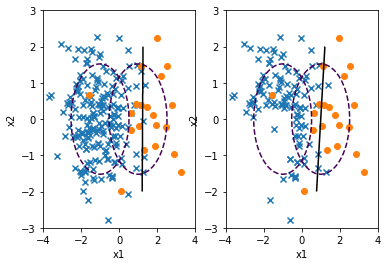

In [10]:
X_samp, y_samp = OneSidedSelection(random_state=0).fit_sample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

In [ ]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

Random Over Sampling은 소수 클래스의 데이터를 반복해서 넣는 것(replacement,즉 가중치를 증가시키는 것과 비슷하다.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


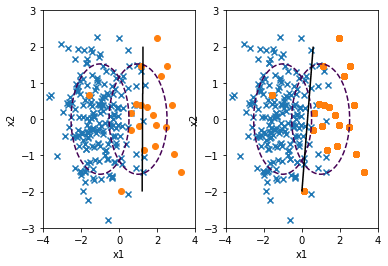

In [11]:
X_samp, y_samp = RandomOverSampler(random_state=0).fit_sample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

In [ ]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

ADASYN(Adaptive Synthetic Sampling) 방법
* 소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법이다.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


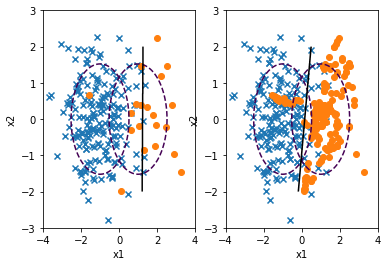

In [13]:
from imblearn.over_sampling import *

X_samp, y_samp = ADASYN(random_state=0).fit_sample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

In [8]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

NameError: name 'model_samp' is not defined

SMOTE(Synthetic Minority Over-sampling Technique)
* ADASYN 방법처럼 데이터를 생성하지만 생성된 데이터를 무조건 소수 클래스라고 하지 않고 분류 모형에 따라 분류한다.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


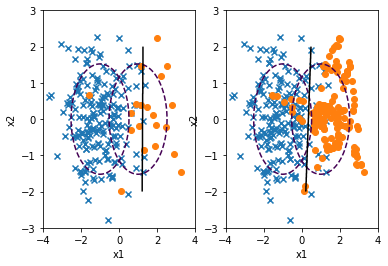

In [14]:
X_samp, y_samp = SMOTE(random_state=4).fit_sample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

In [ ]:
print(classification_report(y_imb, model_samp.predict(X_imb)))